In [ ]:
#importing file1 to colab

from google.colab import files 
uploaded = files.upload()

Saving wine-clustering.csv to wine-clustering (1).csv


In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore') #ignore warning messages 

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc


##1. You need to download “Wine” data

In [ ]:
df = pd.read_csv("wine-clustering.csv")

df.head(5)  #displaying first 5 samples from the dataset

Alcohol  Malic_Acid   Ash  ...   Hue  OD280  Proline
0    14.23        1.71  2.43  ...  1.04   3.92     1065
1    13.20        1.78  2.14  ...  1.05   3.40     1050
2    13.16        2.36  2.67  ...  1.03   3.17     1185
3    14.37        1.95  2.50  ...  0.86   3.45     1480
4    13.24        2.59  2.87  ...  1.04   2.93      735

[5 rows x 13 columns]

##2.2- Remove the missing/infinite values using the mean strategy if required.

In [ ]:
df.info()  #summary info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [ ]:
df.describe() #descriptive info

Alcohol  Malic_Acid         Ash  ...         Hue       OD280      Proline
count  178.000000  178.000000  178.000000  ...  178.000000  178.000000   178.000000
mean    13.000618    2.336348    2.366517  ...    0.957449    2.611685   746.893258
std      0.811827    1.117146    0.274344  ...    0.228572    0.709990   314.907474
min     11.030000    0.740000    1.360000  ...    0.480000    1.270000   278.000000
25%     12.362500    1.602500    2.210000  ...    0.782500    1.937500   500.500000
50%     13.050000    1.865000    2.360000  ...    0.965000    2.780000   673.500000
75%     13.677500    3.082500    2.557500  ...    1.120000    3.170000   985.000000
max     14.830000    5.800000    3.230000  ...    1.710000    4.000000  1680.000000

[8 rows x 13 columns]

In [ ]:
#shows missing values
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [ ]:
# checking for infinity
df.isin([np.inf, -np.inf]).sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [ ]:
df.shape

(178, 13)

In [ ]:
df.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [ ]:
df.head(5)

Alcohol  Malic_Acid   Ash  ...   Hue  OD280  Proline
0    14.23        1.71  2.43  ...  1.04   3.92     1065
1    13.20        1.78  2.14  ...  1.05   3.40     1050
2    13.16        2.36  2.67  ...  1.03   3.17     1185
3    14.37        1.95  2.50  ...  0.86   3.45     1480
4    13.24        2.59  2.87  ...  1.04   2.93      735

[5 rows x 13 columns]

In [ ]:
print(df.columns)

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')


##About Wine data- The following descriptions are adapted from the UCI webpage: These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents (column names given above) found in each of the three types of wines.

## 2.3- Visualize the data in 2-D scatter plot and write the inferences, How the data look like.

In [ ]:
print(df.columns)

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')


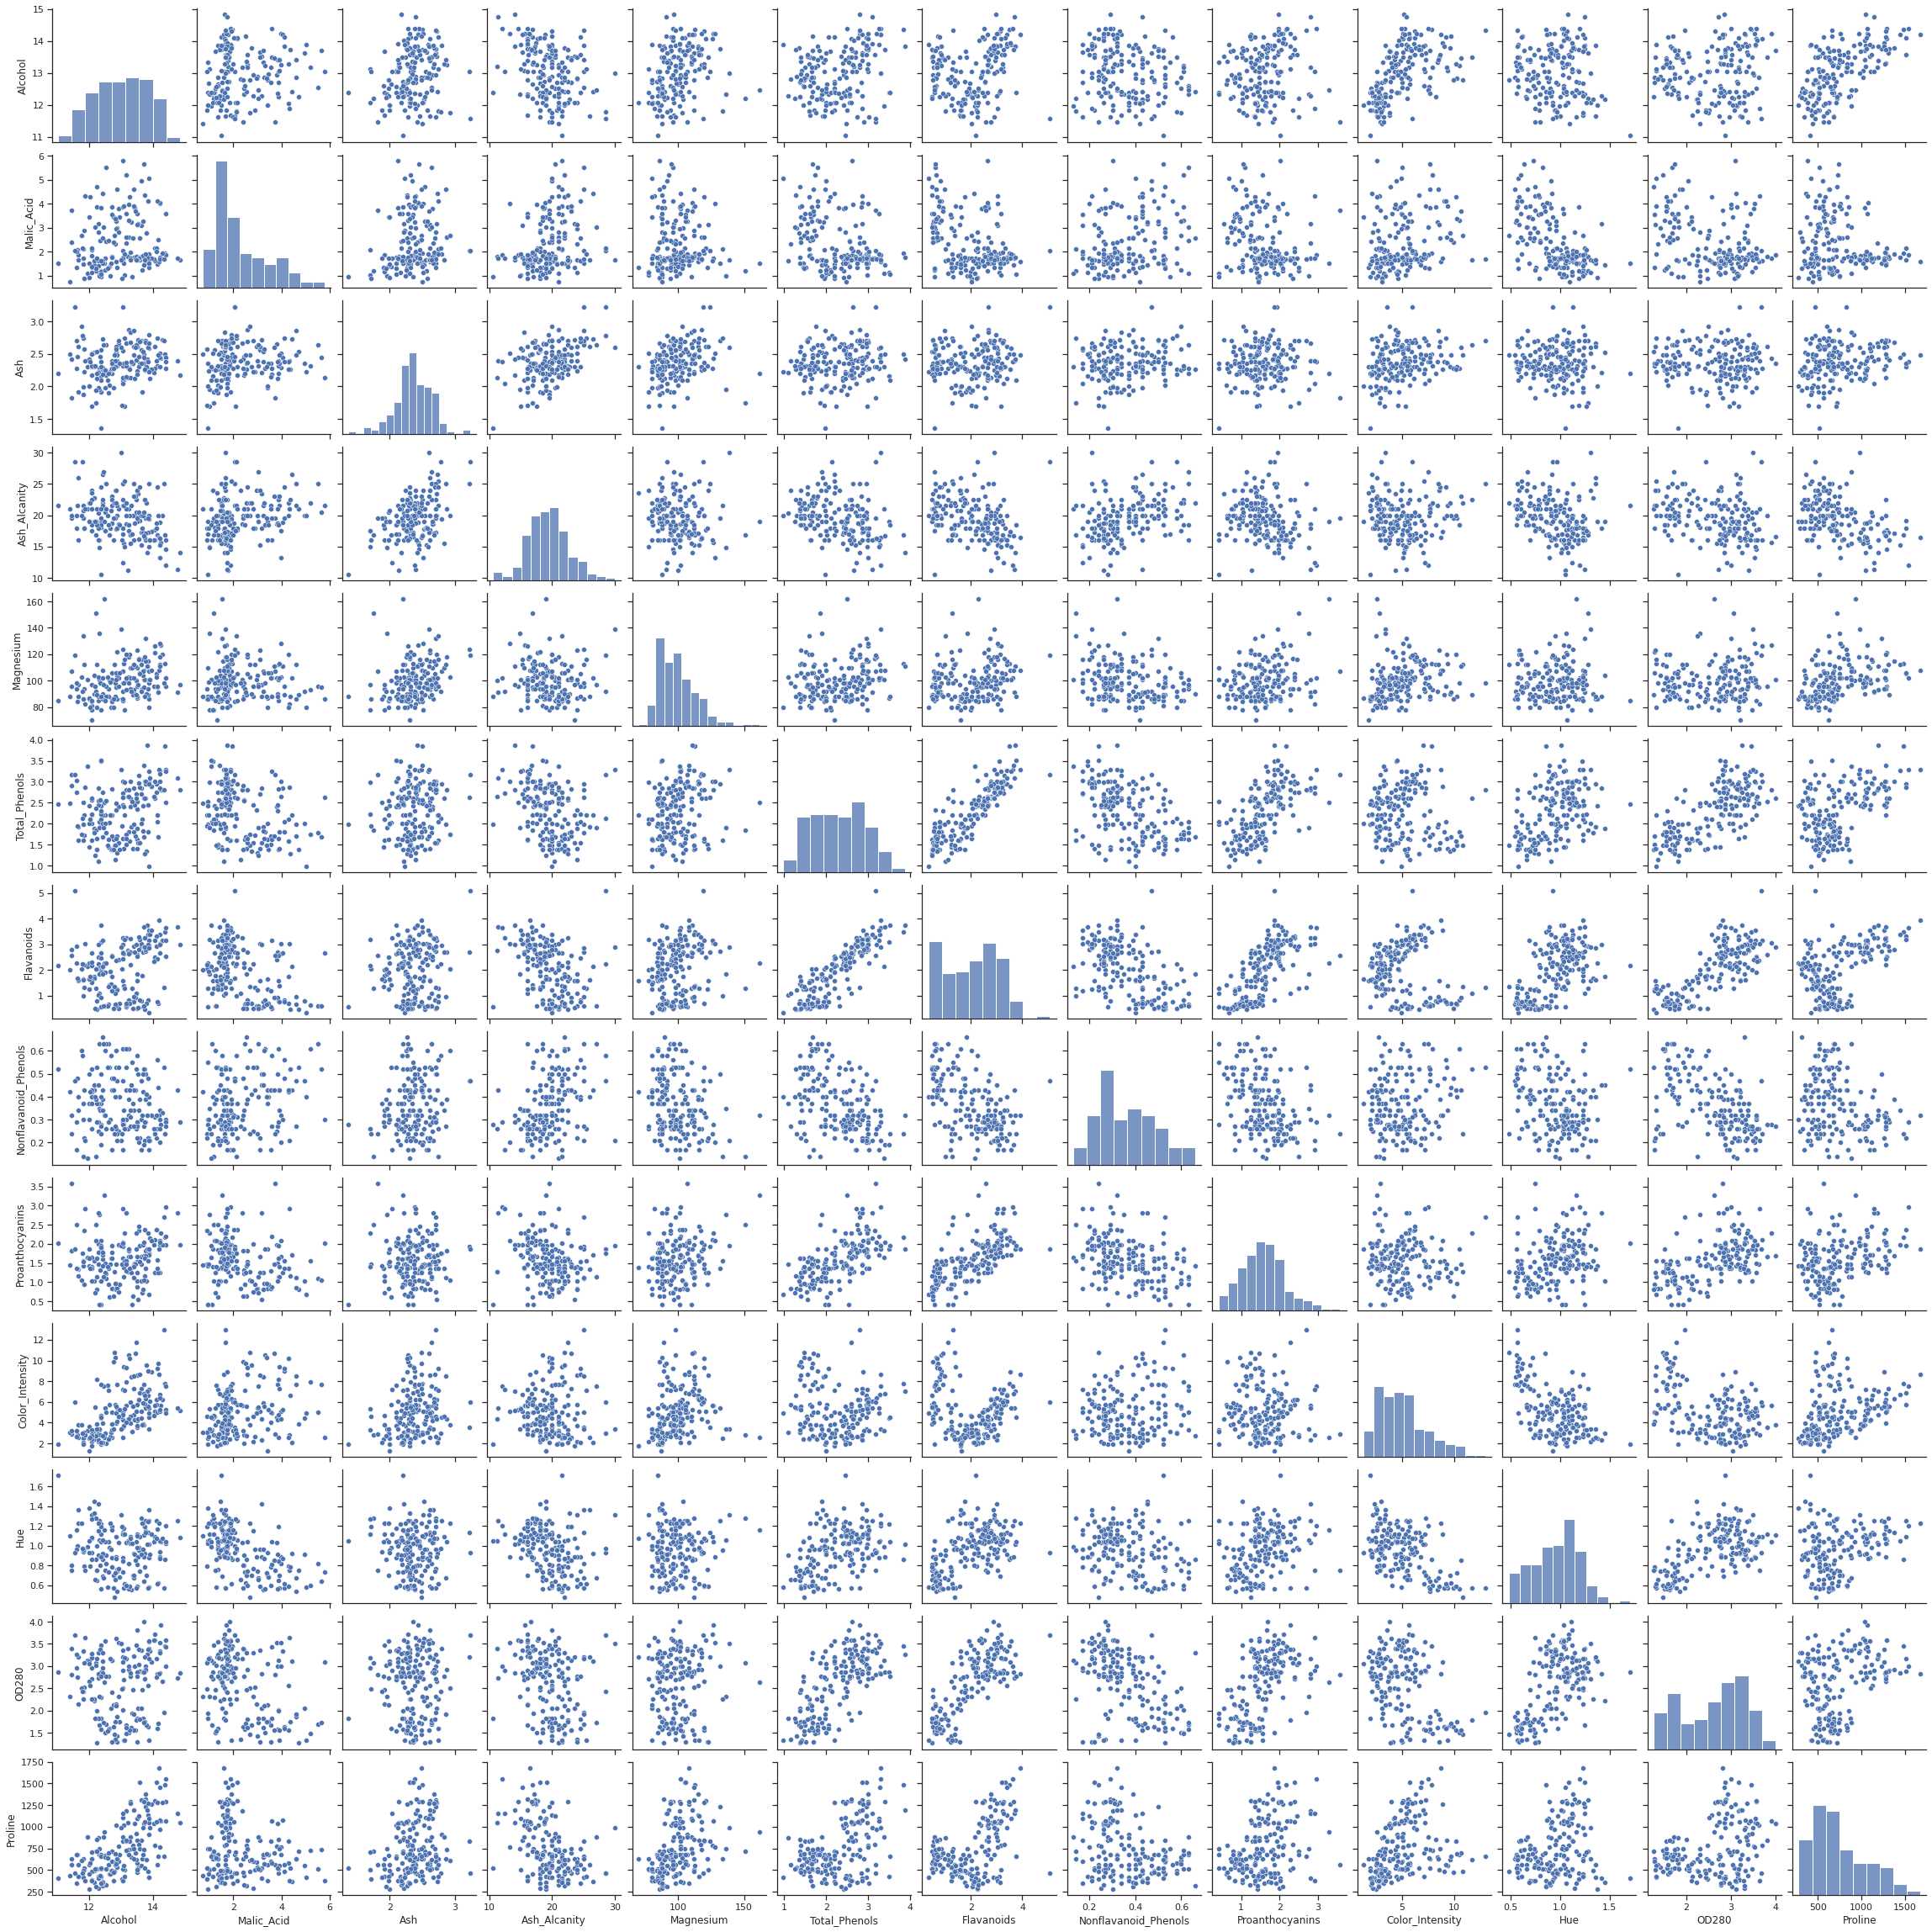

In [ ]:
#exploring the whole dataset

sns.pairplot(df, palette='dark')

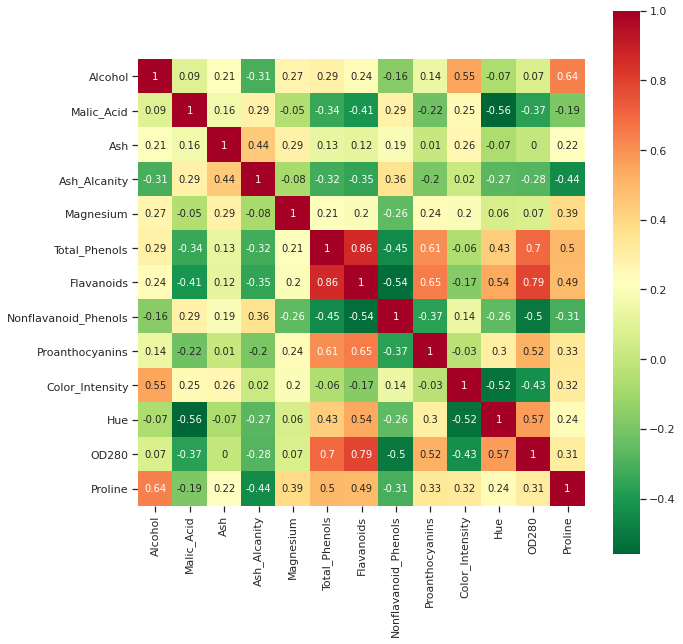

In [ ]:
#studying overall correlation using Heatmap

correlation = df.corr()
plt.subplots(figsize = (10,10))
sns.heatmap(correlation.round(2), annot = True, vmax = 1, square = True, cmap = 'RdYlGn_r')
plt.show()

For correlation coefficient, a +1 means a perfect positive correlation, which means if one increases the other also increases. 
While, -1 means the relationship that exists between two variables is negative all the times. (i.e. when one decreases, the other increases)

From the heatmap above, we found high positive corelation between:

"Flavanoids" and "Total_Phenols" (0.86)

"OD280" and "Flavanoids" (0.79)

"OD280" and "Total_Phenols" (0.7)

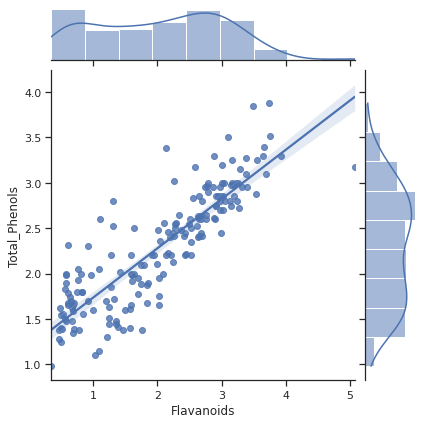

In [ ]:
# Regression line between the High correlated features

sns.jointplot(x=df["Flavanoids"], y=df["Total_Phenols"], data=df, kind="reg")
plt.show()

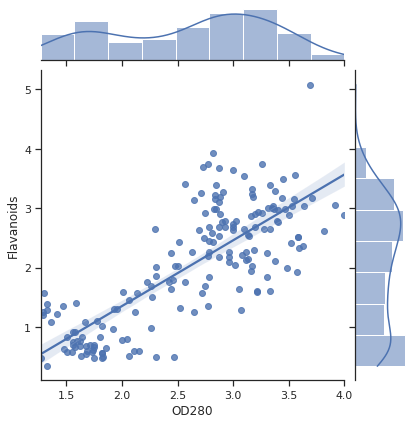

In [ ]:
sns.jointplot(x=df["OD280"], y=df["Flavanoids"], data=df, kind="reg")
plt.show()

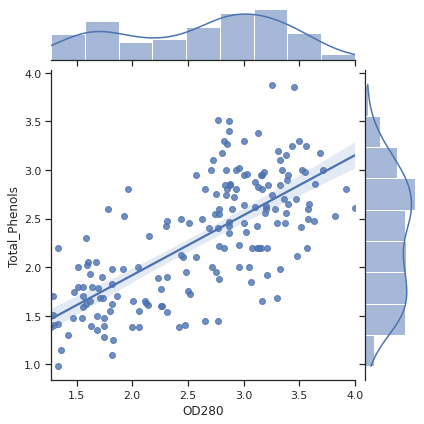

In [ ]:
sns.jointplot(x=df["OD280"], y=df["Total_Phenols"], data=df, kind="reg")
plt.show()

##2.4- Make a boxplot for each feature and highlight the outlier, if any, then remove the outlier, make again box plot to show the outlier effect and write the inferences.

In [ ]:
print(df.columns)

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')


In [ ]:
df.describe()

Alcohol  Malic_Acid         Ash  ...         Hue       OD280      Proline
count  178.000000  178.000000  178.000000  ...  178.000000  178.000000   178.000000
mean    13.000618    2.336348    2.366517  ...    0.957449    2.611685   746.893258
std      0.811827    1.117146    0.274344  ...    0.228572    0.709990   314.907474
min     11.030000    0.740000    1.360000  ...    0.480000    1.270000   278.000000
25%     12.362500    1.602500    2.210000  ...    0.782500    1.937500   500.500000
50%     13.050000    1.865000    2.360000  ...    0.965000    2.780000   673.500000
75%     13.677500    3.082500    2.557500  ...    1.120000    3.170000   985.000000
max     14.830000    5.800000    3.230000  ...    1.710000    4.000000  1680.000000

[8 rows x 13 columns]

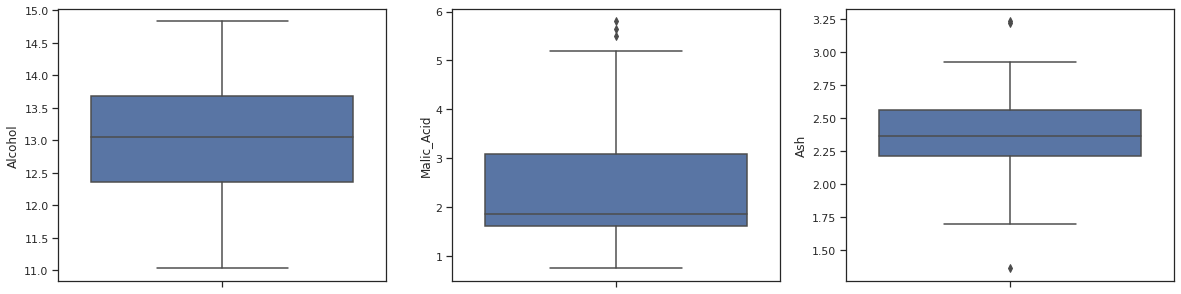

In [ ]:
### Boxplots:

### 'Alcohol', 'Malic_Acid', 'Ash'

sns.set(style="ticks")
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.boxplot(y = 'Alcohol', data = df)

plt.subplot(1,3,2)
sns.boxplot(y = 'Malic_Acid', data = df)

plt.subplot(1,3,3)
sns.boxplot(y = 'Ash', data = df)
plt.show()

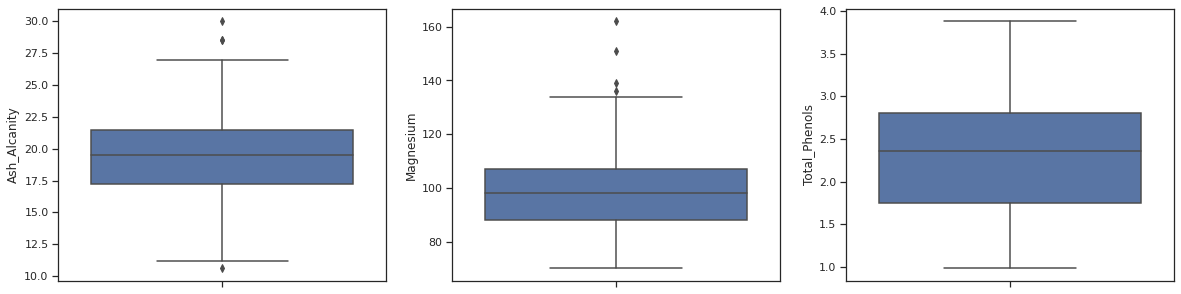

In [ ]:
### Boxplots:

### 'Ash_Alcanity', 'Magnesium', 'Total_Phenols'
sns.set(style="ticks")
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.boxplot(y = 'Ash_Alcanity', data = df)

plt.subplot(1,3,2)
sns.boxplot(y = 'Magnesium', data = df)

plt.subplot(1,3,3)
sns.boxplot(y = 'Total_Phenols', data = df)
plt.show()

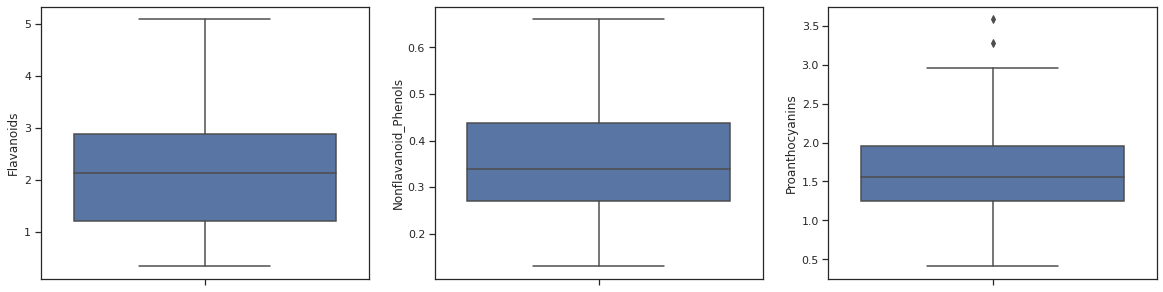

In [ ]:
### Boxplots:

### 'Flavanoids', 'Nonflavanoid_Phenols','Proanthocyanins'

sns.set(style="ticks")
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.boxplot(y = 'Flavanoids', data = df)

plt.subplot(1,3,2)
sns.boxplot(y = 'Nonflavanoid_Phenols', data = df)

plt.subplot(1,3,3)
sns.boxplot(y = 'Proanthocyanins', data = df)
plt.show()

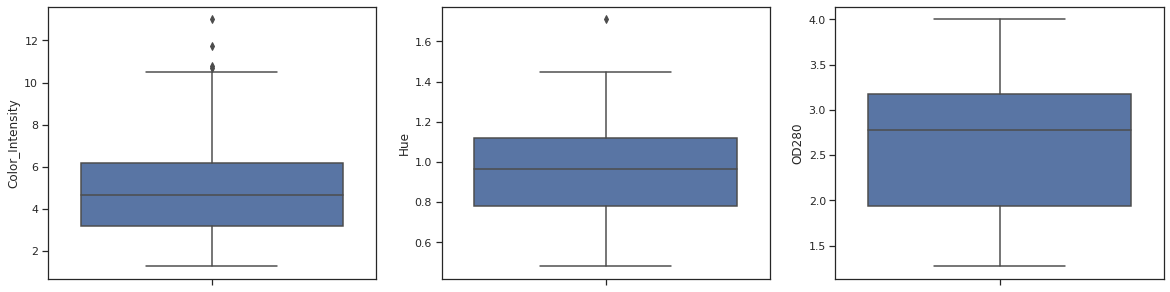

In [ ]:
### Boxplots:

###  'Color_Intensity', 'Hue', 'OD280'
sns.set(style="ticks")
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.boxplot(y = 'Color_Intensity', data = df)

plt.subplot(1,3,2)
sns.boxplot(y = 'Hue', data = df)

plt.subplot(1,3,3)
sns.boxplot(y = 'OD280', data = df)
plt.show()

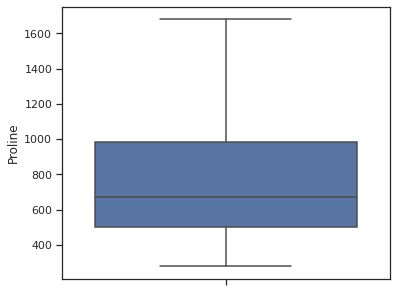

In [ ]:
### Boxplots:

###  'Proline'
sns.set(style="ticks")
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.boxplot(y = 'Proline', data = df)


##Observations of Boxplot- 
Isolated points that can be seen in the box-plots above are the outliers in the Wine-dataset 

In [ ]:
#removing outliers using Inter-Quartile Range

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

df_out = df[~((df < (Q1 -  IQR)) | (df > (Q3 +  IQR))).any(axis=1)]

df_out.shape

Alcohol                   1.3150
Malic_Acid                1.4800
Ash                       0.3475
Ash_Alcanity              4.3000
Magnesium                19.0000
Total_Phenols             1.0575
Flavanoids                1.6700
Nonflavanoid_Phenols      0.1675
Proanthocyanins           0.7000
Color_Intensity           2.9800
Hue                       0.3375
OD280                     1.2325
Proline                 484.5000
dtype: float64


(118, 13)

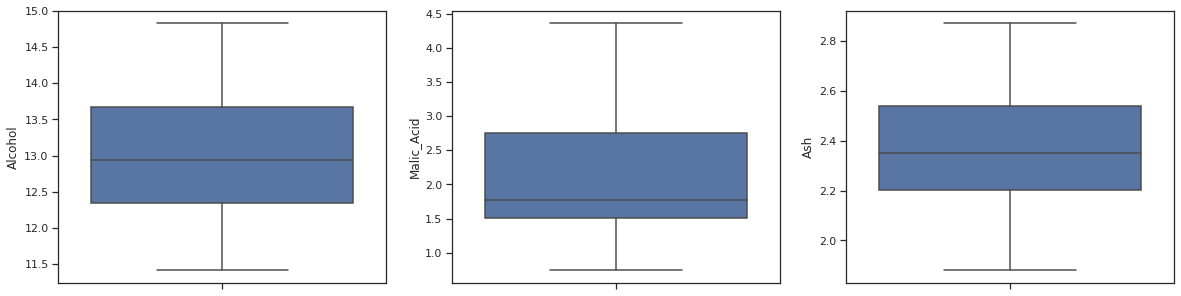

In [ ]:
### Boxplots after Outlier removal:

### 'Alcohol', 'Malic_Acid', 'Ash'

sns.set(style="ticks")
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.boxplot(y = 'Alcohol', data = df_out)

plt.subplot(1,3,2)
sns.boxplot(y = 'Malic_Acid', data = df_out)

plt.subplot(1,3,3)
sns.boxplot(y = 'Ash', data = df_out)
plt.show()

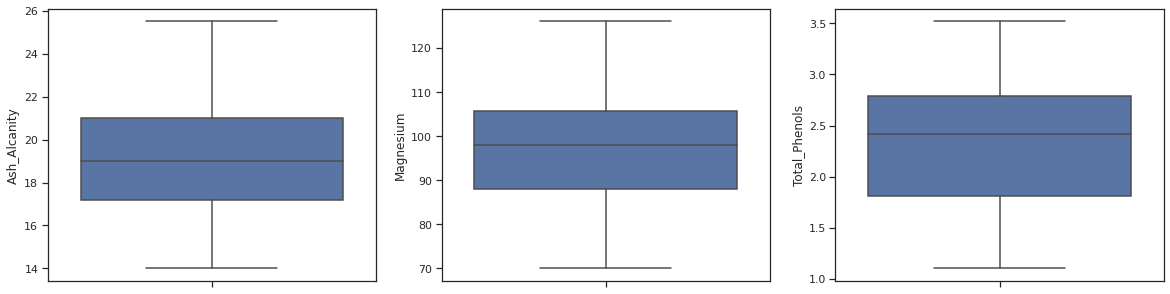

In [ ]:
### Boxplots after Outlier removal:

### 'Ash_Alcanity', 'Magnesium', 'Total_Phenols'
sns.set(style="ticks")
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.boxplot(y = 'Ash_Alcanity', data = df_out)

plt.subplot(1,3,2)
sns.boxplot(y = 'Magnesium', data = df_out)

plt.subplot(1,3,3)
sns.boxplot(y = 'Total_Phenols', data = df_out)
plt.show()

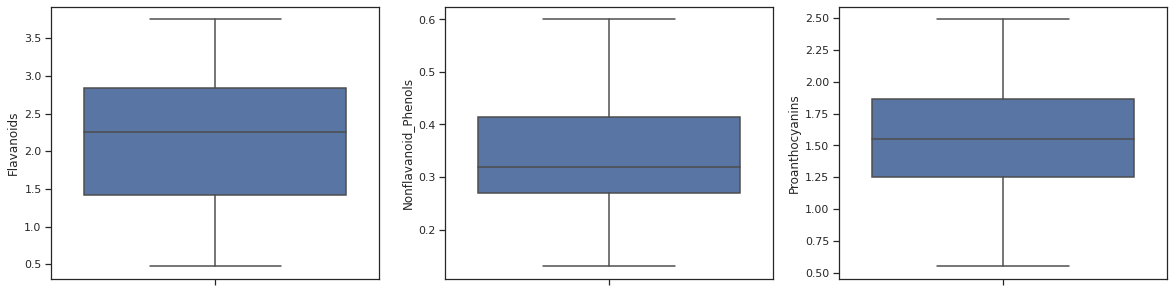

In [ ]:
### Boxplots after Outlier removal:

### 'Flavanoids', 'Nonflavanoid_Phenols','Proanthocyanins'

sns.set(style="ticks")
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.boxplot(y = 'Flavanoids', data = df_out)

plt.subplot(1,3,2)
sns.boxplot(y = 'Nonflavanoid_Phenols', data = df_out)

plt.subplot(1,3,3)
sns.boxplot(y = 'Proanthocyanins', data = df_out)
plt.show()

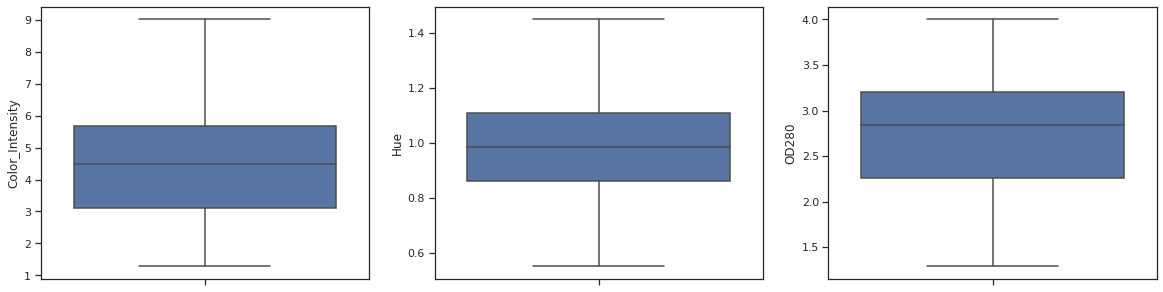

In [ ]:
### Boxplots after Outlier removal:

###  'Color_Intensity', 'Hue', 'OD280'
sns.set(style="ticks")
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.boxplot(y = 'Color_Intensity', data = df_out)

plt.subplot(1,3,2)
sns.boxplot(y = 'Hue', data = df_out)

plt.subplot(1,3,3)
sns.boxplot(y = 'OD280', data = df_out)
plt.show()

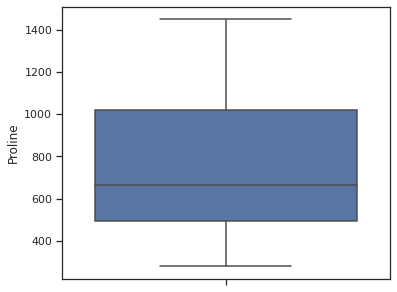

In [ ]:
### Boxplots after Outlier removal:

###  'Proline'
sns.set(style="ticks")
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.boxplot(y = 'Proline', data = df_out)

In [ ]:
df.describe()

Alcohol  Malic_Acid         Ash  ...         Hue       OD280      Proline
count  178.000000  178.000000  178.000000  ...  178.000000  178.000000   178.000000
mean    13.000618    2.336348    2.366517  ...    0.957449    2.611685   746.893258
std      0.811827    1.117146    0.274344  ...    0.228572    0.709990   314.907474
min     11.030000    0.740000    1.360000  ...    0.480000    1.270000   278.000000
25%     12.362500    1.602500    2.210000  ...    0.782500    1.937500   500.500000
50%     13.050000    1.865000    2.360000  ...    0.965000    2.780000   673.500000
75%     13.677500    3.082500    2.557500  ...    1.120000    3.170000   985.000000
max     14.830000    5.800000    3.230000  ...    1.710000    4.000000  1680.000000

[8 rows x 13 columns]

In [ ]:
df_out.describe()

Alcohol  Malic_Acid         Ash  ...         Hue       OD280      Proline
count  118.000000  118.000000  118.000000  ...  118.000000  118.000000   118.000000
mean    12.990508    2.126864    2.357881  ...    0.974373    2.705932   743.737288
std      0.792328    0.898817    0.231560  ...    0.196809    0.668008   308.603843
min     11.410000    0.740000    1.880000  ...    0.550000    1.290000   278.000000
25%     12.345000    1.515000    2.202500  ...    0.862500    2.262500   495.000000
50%     12.945000    1.770000    2.350000  ...    0.985000    2.840000   666.000000
75%     13.677500    2.755000    2.537500  ...    1.107500    3.207500  1018.750000
max     14.830000    4.360000    2.870000  ...    1.450000    4.000000  1450.000000

[8 rows x 13 columns]

##Observations (after outliers removal)-

-Skewness is reduced

-Mean changes

##2.5- Normalized the data if required, and write a note for what, why and how you performed normalization.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data_normed = df.copy()
data_normed[data_normed.columns] = scaler.fit_transform(data_normed)

data_normed

Alcohol  Malic_Acid       Ash  ...       Hue     OD280   Proline
0    0.842105    0.191700  0.572193  ...  0.455285  0.970696  0.561341
1    0.571053    0.205534  0.417112  ...  0.463415  0.780220  0.550642
2    0.560526    0.320158  0.700535  ...  0.447154  0.695971  0.646933
3    0.878947    0.239130  0.609626  ...  0.308943  0.798535  0.857347
4    0.581579    0.365613  0.807487  ...  0.455285  0.608059  0.325963
..        ...         ...       ...  ...       ...       ...       ...
173  0.705263    0.970356  0.582888  ...  0.130081  0.172161  0.329529
174  0.623684    0.626482  0.598930  ...  0.178862  0.106227  0.336662
175  0.589474    0.699605  0.481283  ...  0.089431  0.106227  0.397290
176  0.563158    0.365613  0.540107  ...  0.097561  0.128205  0.400856
177  0.815789    0.664032  0.737968  ...  0.105691  0.120879  0.201141

[178 rows x 13 columns]

##Normalization:

#Purpose- 
It is done if some of the columns have very high numeric values, they will suppress the affect of other columns. Columns with lesser values wouldn't show much in the model.

IQR shows high values for- Ash_Alcanity              4.3000, 
Magnesium                19.0000, Proline                 484.5000

Therefore, normalization was needed to scale down the above values.

#Method-
Normalization is a rescaling of the data from the original range. After normatlization, all values are within the new range of 0 and 1.

Norm. value = (x – min) / (max – min)

(First estimate the maximum and minimum values of a feature. Then calculate the normalized value of each data point by the above formula)

You could see that if 'x' (a feature sample value) is provided that is within the range of it's minimum and maximum values, then the normalized value caluclated will be in the range of 0 and 1. 

In [ ]:
data_normed.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

##3. Perform at least five clustering methods with varying cluster sizes. Find correct cluster numbers for each method and show with line plot; how you finalized this cluster number.

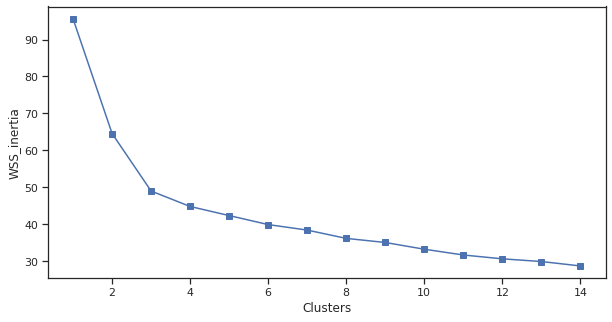

In [ ]:
#Applying clustering methods on the 'data_normed' dataset

#Method 1: K-Means clustering

#K-means

seed=1
WSS_inertia_scaled = []

for cluster in range(1,15):
    km = KMeans(n_clusters = cluster, random_state=seed)
    km.fit(data_normed)
    WSS_inertia_scaled.append(km.inertia_)


#Elbow method for plotting
df_Cluster_WSS_inertia = pd.DataFrame({'Cluster':range(1,15), 'WSS_inertia':WSS_inertia_scaled})

plt.figure(figsize=(10,5))
plt.plot(df_Cluster_WSS_inertia['Cluster'], df_Cluster_WSS_inertia['WSS_inertia'], marker='s')
plt.xlabel("Clusters")
plt.ylabel("WSS_inertia")
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.29872218159747743
For n_clusters = 3 The average silhouette_score is : 0.3013463273503232
For n_clusters = 4 The average silhouette_score is : 0.25993667561623146
For n_clusters = 5 The average silhouette_score is : 0.2437817188094557
For n_clusters = 6 The average silhouette_score is : 0.17585039520298734


Text(0, 0.5, 'Silhouette Score')

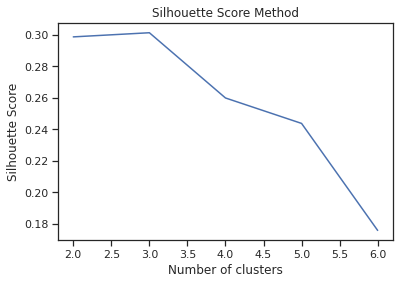

In [ ]:
# Silhouette Score Method for K-means clustering
from sklearn.metrics import silhouette_samples, silhouette_score

seed = 0
dict_sil_score_avg = dict()

#cluster_range = range(2,7)
for k in range(2,7):
    km = KMeans(n_clusters = k, random_state=seed)
    cluster_labels = km.fit_predict(data_normed)
    
    sil_score_avg = silhouette_score(data_normed, cluster_labels)
    print("For n_clusters =", k, "The average silhouette_score is :", sil_score_avg)
    
    dict_sil_score_avg[k] = sil_score_avg


# Plotting a line graph to compare the silhouette_score for different values of clusters (i.e. 2,3,4,5,6)
silhouette_df = pd.Series(dict_sil_score_avg)

ax = silhouette_df.plot(title = 'Silhouette Score Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette Score')

##Observations for K-means clustering-

The average silhouette score is maximized for clusters = 3. 
Hence, no. of clusters = 3

This score above gives insights into the separation between clusters and the density of each cluster.

In [ ]:
km = KMeans(n_clusters=3, init='k-means++', random_state=seed)
km.fit(data_normed)
pred_km3 = km.predict(data_normed)

#frame = pd.DataFrame(data_normed)
df['cluster'] = pred_km3
print(df['cluster'].value_counts())

label_pred_KM = km.labels_
print("\Classes predicted by K-Means:",label_pred_KM)

centroids_KM= km.cluster_centers_
print("\nShape of centroids_KM",centroids_KM.shape)
print("Centroids:",centroids_KM)

inertia_KM = km.inertia_
print("\nInertia:",inertia_KM)

1    63
0    61
2    54
Name: cluster, dtype: int64
\Classes predicted by K-Means: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 2 1 1 1 1 1 1 2 1 2 1 1 0
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]

Shape of centroids_KM (3, 14)
Centroids: [[7.05651424e-01 2.48428692e-01 5.84904006e-01 3.44431300e-01
  4.10727014e-01 6.42114189e-01 5.54679394e-01 3.00340241e-01
  4.77271552e-01 3.55340458e-01 4.77808876e-01 6.90386117e-01
  5.93893969e-01 4.44089210e-16]
 [3.13366750e-01 2.35617040e-01 4.73049826e-01 5.00245459e-01
  2.45514148e-01 4.48056924e-01 3.80081709e-01 4.18688230e-01
  3.97175905e-01 1.47786987e-01 4.72189960e-01 5.84220013e-01
  1.56375246e-01 2.00000000e+00]
 [5.46686160e-01 4.84409310e-01 5.61596356e-01 5.38659794e-01
  3.15217391e


##K-Means Clustering
gropus into clusters of equal variance by minimizing the inertia or within-cluster sum-of-squares (WSS).

Predicting the no. of cluster by Elbow Method

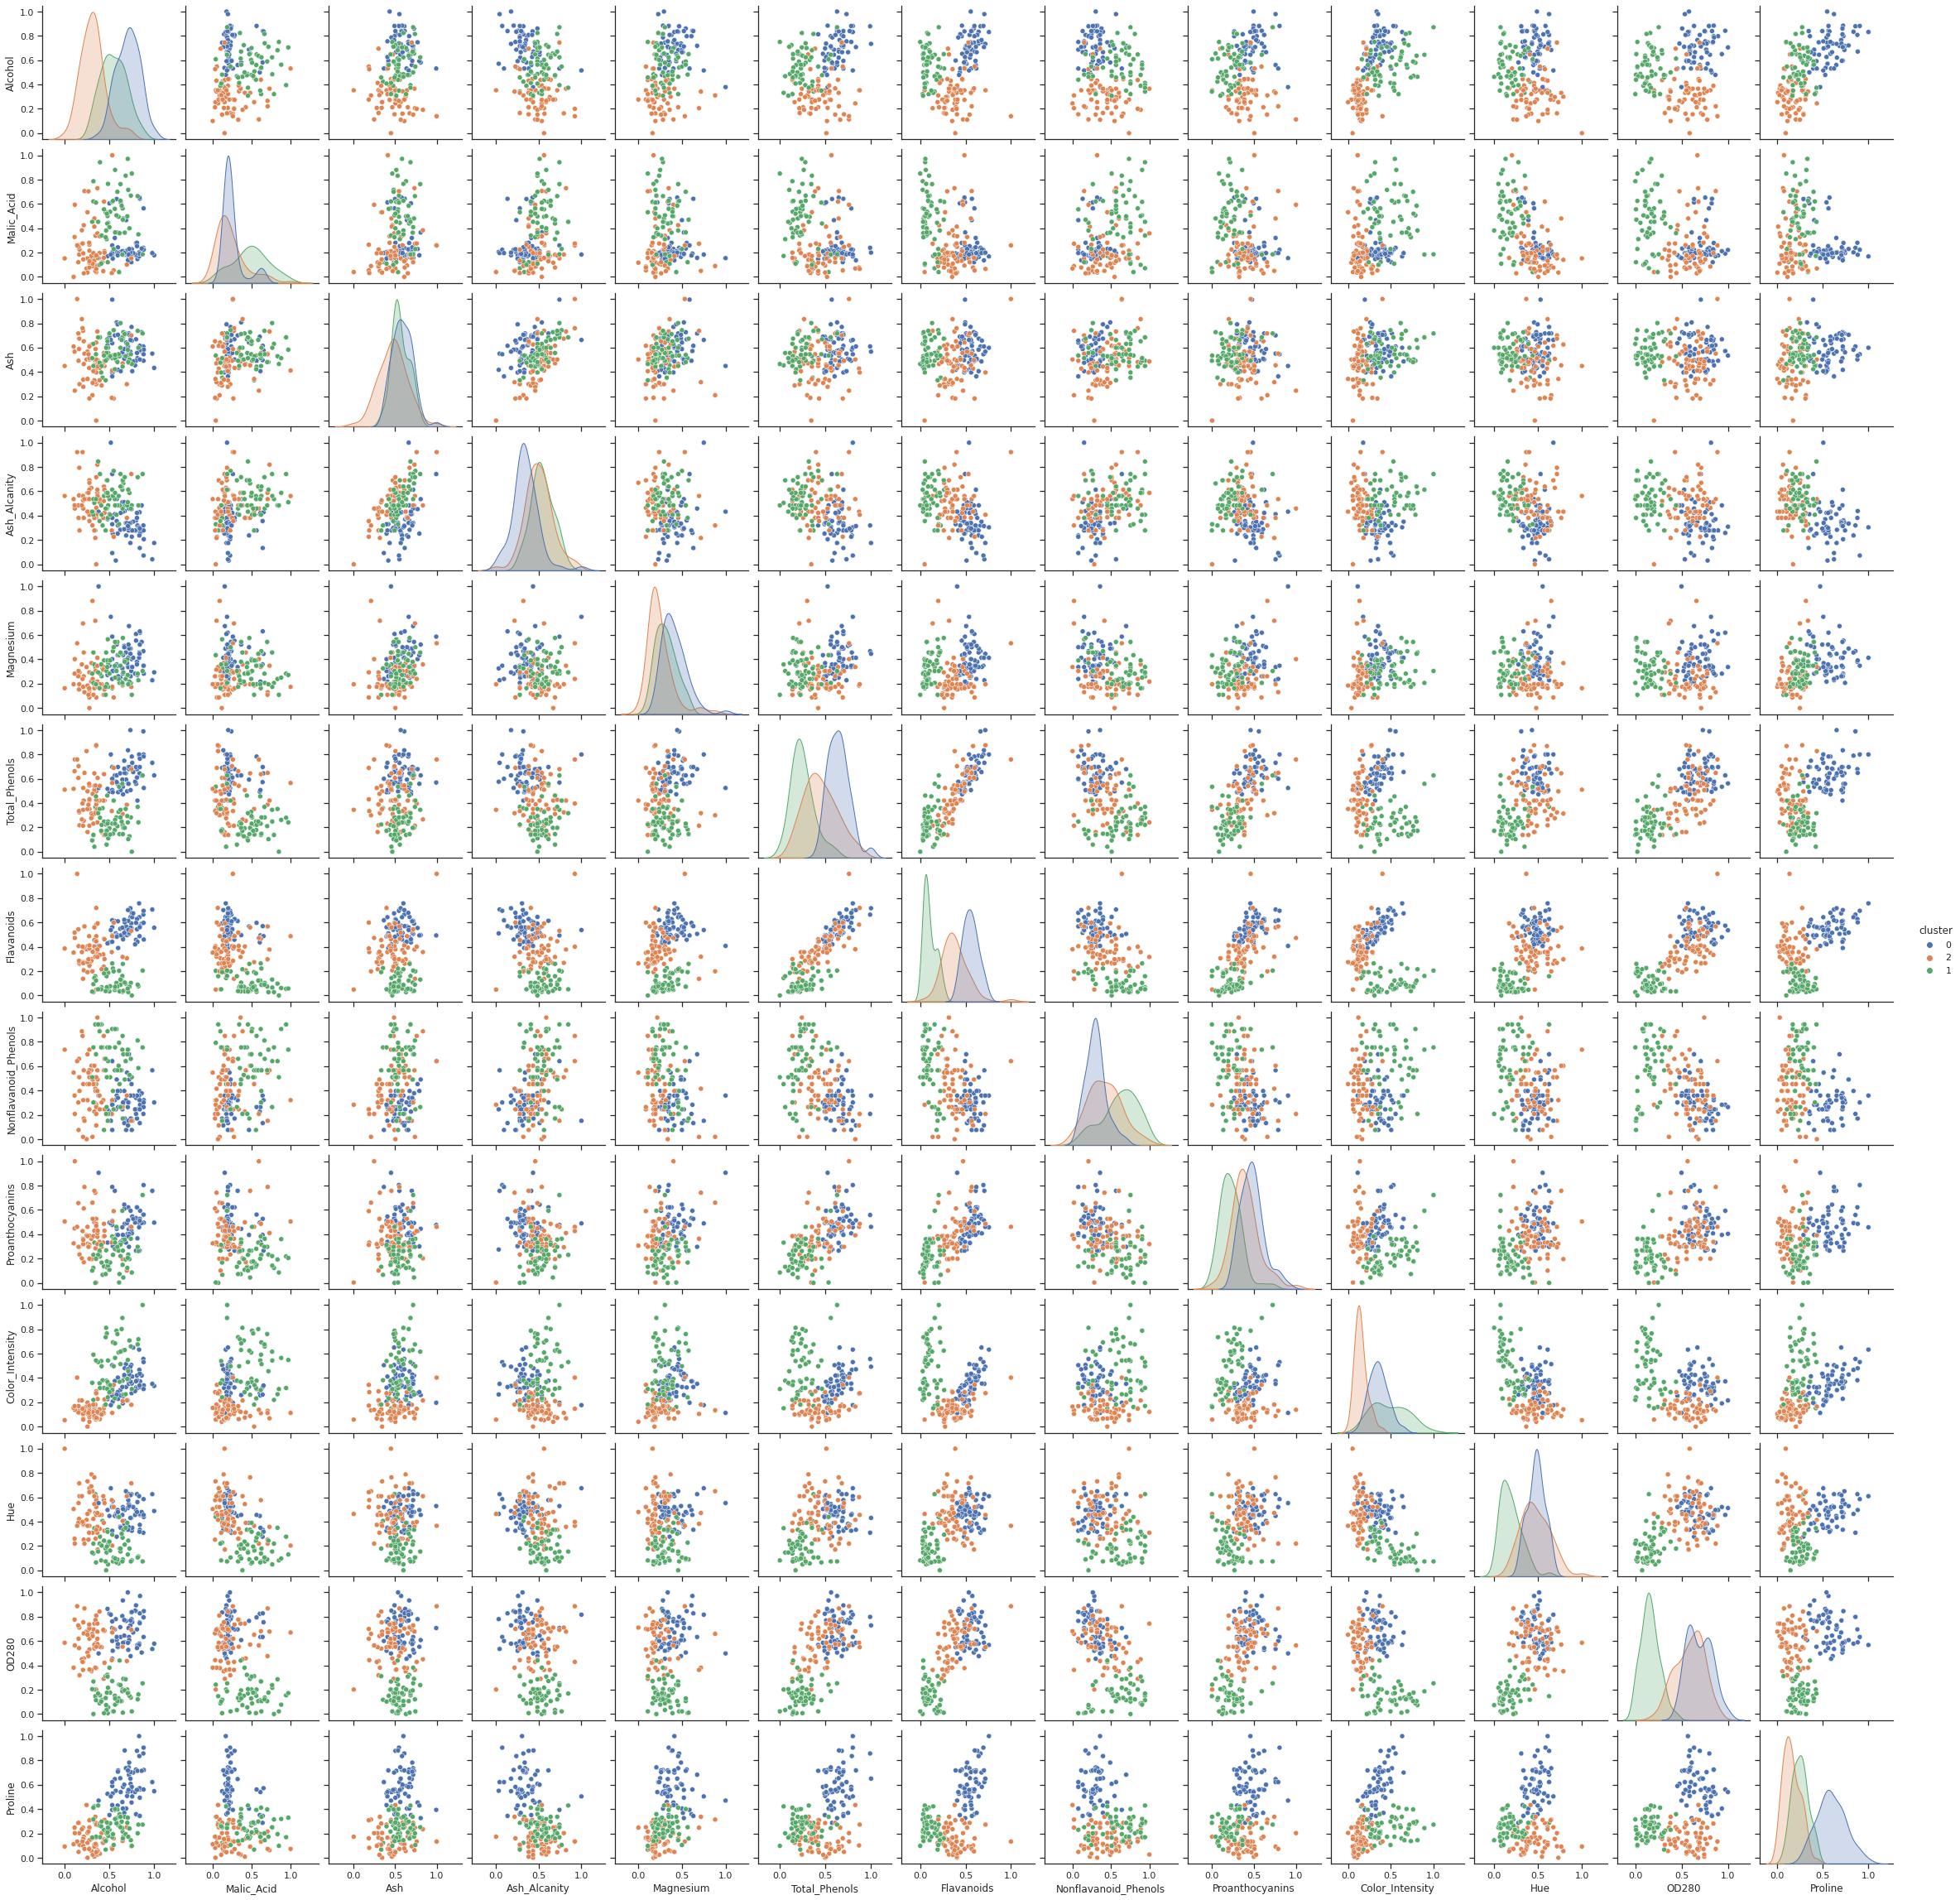

In [ ]:
# Pairplot
data_normed['cluster'] = label_pred_KM.astype(str)
sns_plot = sns.pairplot(data_normed, hue = "cluster")

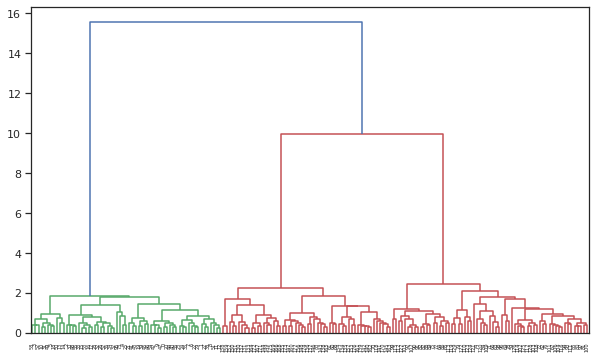

In [ ]:
##Method 2: Hierarchical clustering 

#dendograms

plt.figure(figsize=(10, 6))  
dendogram = sch.dendrogram(sch.linkage(data_normed, method='ward'))

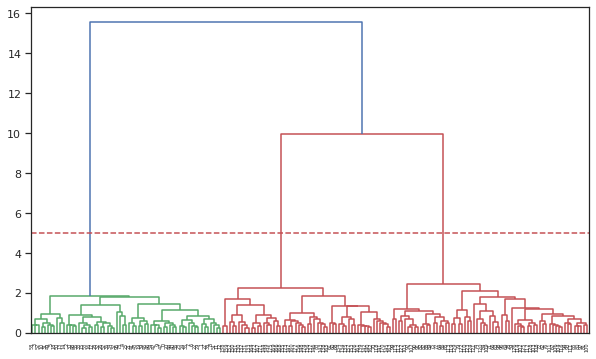

In [ ]:
plt.figure(figsize=(10, 6))  
dend = shc.dendrogram(shc.linkage(data_normed, method='ward'))
plt.axhline(y=5, color='r', linestyle='--')

For n_clusters = 2 The average silhouette_score is : 0.49752234636597265
For n_clusters = 3 The average silhouette_score is : 0.5363071576162354
For n_clusters = 4 The average silhouette_score is : 0.4020991348092688
For n_clusters = 5 The average silhouette_score is : 0.2977516918780558
For n_clusters = 6 The average silhouette_score is : 0.30646662153702176


Text(0, 0.5, 'Silhouette Score')

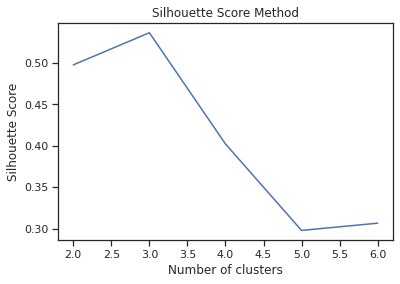

In [ ]:
# Silhouette Score Method for Heirachial clustering

seed = 0
dict_sil_score_avg_AC = dict()

for k in range(2,7):
    ac = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward') 
    cluster_labels = ac.fit_predict(data_normed)
    
    sil_score_avg_AC = silhouette_score(data_normed, cluster_labels)
    print("For n_clusters =", k, "The average silhouette_score is :", sil_score_avg_AC)
    
    dict_sil_score_avg_AC[k] = sil_score_avg_AC


# Plotting a line graph to compare the silhouette_score for different values of clusters (i.e. 2,3,4,5,6)
silhouette_df_AC = pd.Series(dict_sil_score_avg_AC)

ax = silhouette_df_AC.plot(title = 'Silhouette Score Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette Score')

##Observation of Hierarchial Clustering:

For n_clusters = 3 The average silhouette_score is : 0.5363071576162354

Since, this is maximum, hence no. of clusters predicted =3

In [ ]:
ac3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
pred_ac3 = ac3.fit_predict(data_normed)

df['cluster'] = pred_ac3
print(df['cluster'].value_counts())

0    63
1    61
2    54
Name: cluster, dtype: int64


Text(0, 0.5, 'AIC & BIC values')

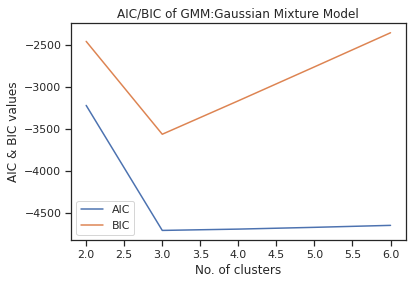

In [ ]:
#Method 3: Gaussian Mixture Model

from sklearn.mixture import GaussianMixture

#estimating AIC (information criterion 1) & BIC (information criterion 2)- used to select optimal number of clusters. 
aic =dict()
bic =dict()
seed = 0

for k in range(2,7):
	gmm = GaussianMixture(n_components = k, random_state=seed)
	res = gmm.fit(data_normed)
	IC_1 = gmm.aic(data_normed)
	IC_2 = gmm.bic(data_normed)
	aic[k] = IC_1
	bic[k] = IC_2
    
aic_df = pd.Series(aic)  #to dataframe
bic_df = pd.Series(bic)  ##to dataframe

temp = {'AIC' : aic_df, 'BIC' : bic_df}  #a dictionary to hold AIC & BIC values
ic_df = pd.DataFrame(temp)

ax = ic_df.plot(title='AIC/BIC of GMM:Gaussian Mixture Model')
ax.set_xlabel('No. of clusters')
ax.set_ylabel('AIC & BIC values')

##Observation of GMM:

GMM is a probabilistic model which implements Expectation-Maximization algo. (EM algo)

For minimum values of AIC & BIC, the optimal no. of clusters predicted = 3

In [ ]:
GMM3 = GaussianMixture(n_components = 3, random_state=seed)
pred_GMM3 = GMM3.fit_predict(data_normed)

df['cluster'] = pred_GMM3
print(df['cluster'].value_counts())

sh_score_GMM = silhouette_score(data_normed, pred_GMM3)
print("Silhouette score of cluster(=3) by GMM:",sh_score_GMM)

1    63
0    61
2    54
Name: cluster, dtype: int64
Silhouette score of cluster(=3) by GMM: 0.5363071576162354


##4. Compare all the clustering methods, and write how you compared, what method you used and why?

#Model evaluation:

#for no. of clusters=3

For no. of Clusters =3, The average silhouette_score for KMeans is : 0.3013463273503232

For no. of Clusters =3, The average silhouette_score for Heirarchial Clustering  is : 0.5363071576162354

For no. of Clusters =3, The average silhouette_score for GMM is : 0.5363071576162354

Closer the score is to 1, better is the clustering model.

Methodology of each model is mentioned above (after each model code)


###5. Do steps 3 and 4 again after dimension reduction, and show whether it is helpful; if not, why?

Cumulative variance explained by 2 PC: 80.41%


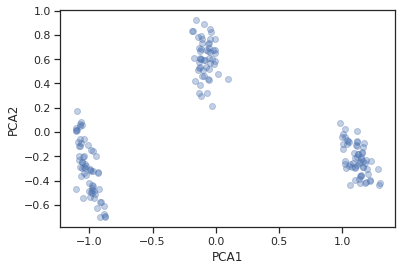

In [ ]:
#Reducing the dimensionality of the original dataset

from sklearn.decomposition import PCA
seed = 1

pca2 = PCA(n_components = 2, random_state=seed)
X_principal = pca2.fit_transform(data_normed)

X_principal = pd.DataFrame(X_principal)  #reduced data to dataframe
X_principal.columns = ['P1', 'P2']

print ('Cumulative variance explained by 2 PC: {:.2%}'.format(np.sum(pca2.explained_variance_ratio_)))

plt.scatter(x=X_principal.iloc[:,0], y=X_principal.iloc[:,1], alpha = 0.333)
plt.ylabel('PCA2')
plt.xlabel('PCA1')
plt.show()

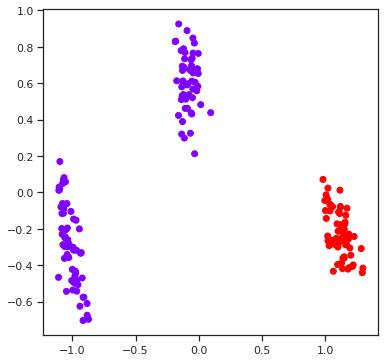

In [ ]:
#KMeans & PCA

km2_pca = KMeans(n_clusters = 2, random_state=seed)

# Visualize the clusters
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], c = km2_pca.fit_predict(X_principal), cmap ='rainbow')
plt.show()

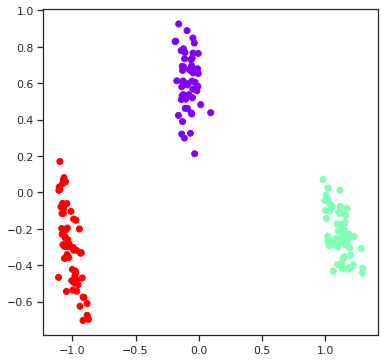

In [ ]:
km3_pca = KMeans(n_clusters = 3, random_state=seed)

# Visualizing 
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], c = km3_pca.fit_predict(X_principal), cmap ='rainbow')
plt.show()

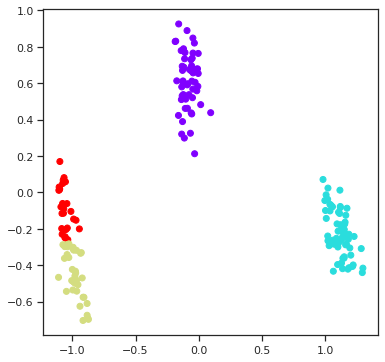

In [ ]:
km4_pca = KMeans(n_clusters = 4, random_state=seed)

# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], c = km4_pca.fit_predict(X_principal), cmap ='rainbow')
plt.show()

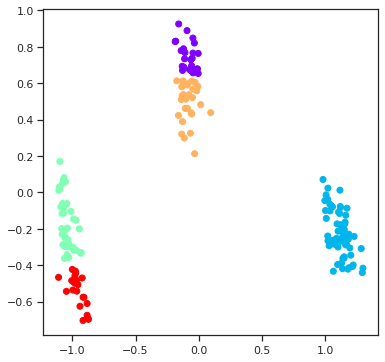

In [ ]:
km5_pca = KMeans(n_clusters = 5, random_state=seed)

# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], c = km5_pca.fit_predict(X_principal), cmap ='rainbow')
plt.show()

In [ ]:
km6_pca = KMeans(n_clusters = 6, random_state=seed)

# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], c = km6_pca.fit_predict(X_principal), cmap ='rainbow')
plt.show()

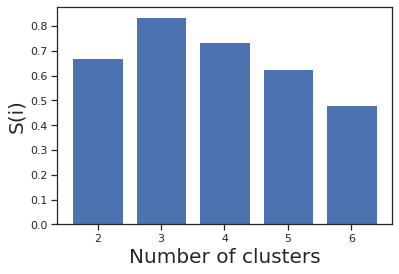

In [ ]:
k = [2, 3, 4, 5, 6]
  
# To append the silhouette scores of the Kmeans model for different no. of clusters
silhouette_scores_km_pca = []

silhouette_scores_km_pca.append(silhouette_score(X_principal, km2_pca.fit_predict(X_principal)))
silhouette_scores_km_pca.append(silhouette_score(X_principal, km3_pca.fit_predict(X_principal)))
silhouette_scores_km_pca.append(silhouette_score(X_principal, km4_pca.fit_predict(X_principal)))
silhouette_scores_km_pca.append(silhouette_score(X_principal, km5_pca.fit_predict(X_principal)))
silhouette_scores_km_pca.append(silhouette_score(X_principal, km6_pca.fit_predict(X_principal)))
  
# Plot a bar graph to compare the results
plt.bar(k, silhouette_scores_km_pca)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

###Observation of KMeans Clust. after PCA:

no. of clusters predicted =3, since it has maximum silhouette_scores_km_pca

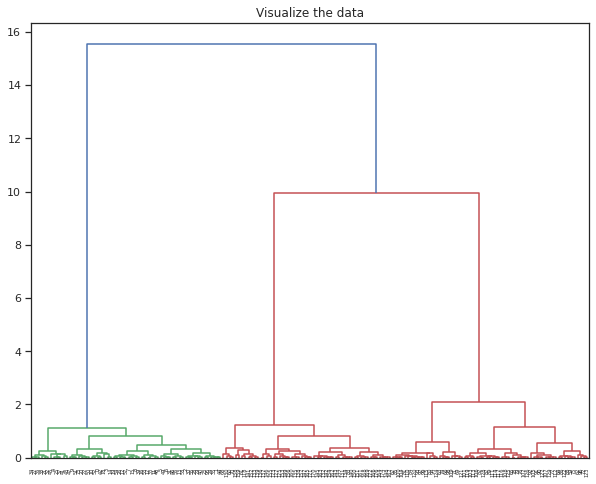

In [ ]:
plt.figure(figsize =(10, 8))

plt.title('Visualize the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

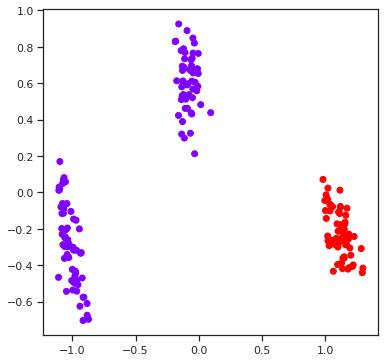

In [ ]:
ac2_pca = AgglomerativeClustering(n_clusters = 2)
  
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], c = ac2_pca.fit_predict(X_principal), cmap ='rainbow')
plt.show()

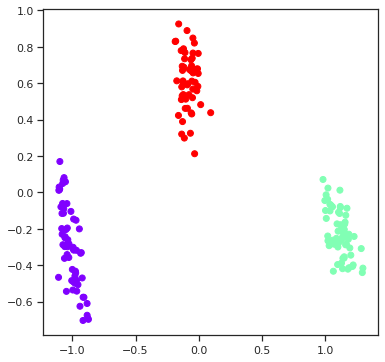

In [ ]:
ac3_pca = AgglomerativeClustering(n_clusters = 3)
  
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], c = ac3_pca.fit_predict(X_principal), cmap ='rainbow')
plt.show()

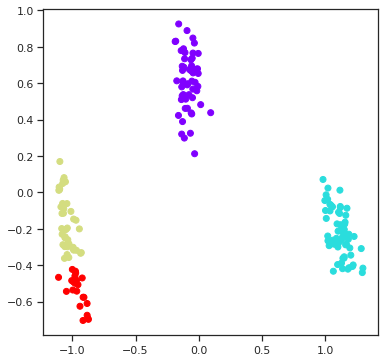

In [ ]:
ac4_pca = AgglomerativeClustering(n_clusters = 4)
  
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], c = ac4_pca.fit_predict(X_principal), cmap ='rainbow')
plt.show()

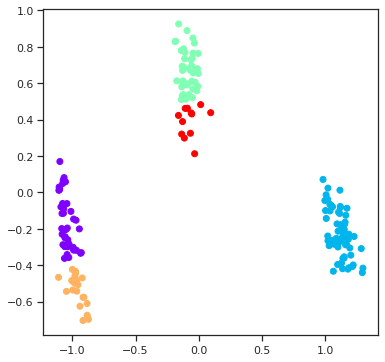

In [ ]:
ac5_pca = AgglomerativeClustering(n_clusters = 5)
  
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], c = ac5_pca.fit_predict(X_principal), cmap ='rainbow')
plt.show()

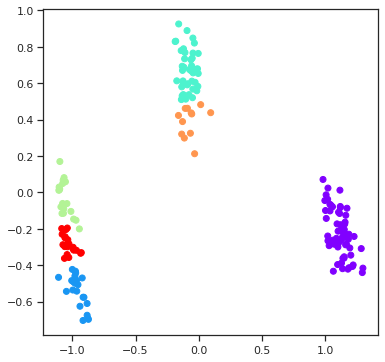

In [ ]:
ac6_pca = AgglomerativeClustering(n_clusters = 6)
  
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], c = ac6_pca.fit_predict(X_principal), cmap ='rainbow')
plt.show()

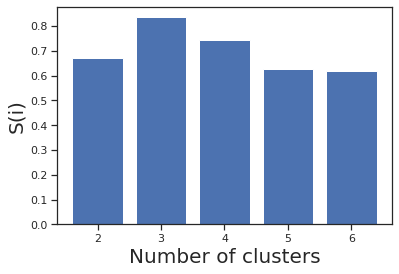

In [ ]:
k = [2, 3, 4, 5, 6]
  
# To append the silhouette scores of the Heirachial model for different no. of clusters
silhouette_scores_ac_pca = []

silhouette_scores_ac_pca.append(silhouette_score(X_principal, ac2_pca.fit_predict(X_principal)))
silhouette_scores_ac_pca.append(silhouette_score(X_principal, ac3_pca.fit_predict(X_principal)))
silhouette_scores_ac_pca.append(silhouette_score(X_principal, ac4_pca.fit_predict(X_principal)))
silhouette_scores_ac_pca.append(silhouette_score(X_principal, ac5_pca.fit_predict(X_principal)))
silhouette_scores_ac_pca.append(silhouette_score(X_principal, ac6_pca.fit_predict(X_principal)))
  
# Plot a bar graph to compare the results
plt.bar(k, silhouette_scores_ac_pca)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

###Observation of Agglo. Clust. after PCA:

no. of clusters predicted =3, since it has maximum silhouette_scores_ac_pca

In [ ]:
#GMM & PCA

GMM2_pca = GaussianMixture(n_components = 2, random_state=seed)

plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], c = GMM2_pca.fit_predict(X_principal), cmap ='rainbow')
plt.show()

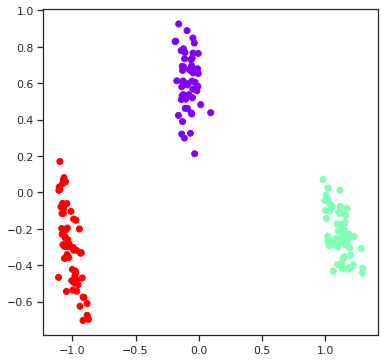

In [ ]:
GMM3_pca = GaussianMixture(n_components = 3, random_state=seed)

plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], c = GMM3_pca.fit_predict(X_principal), cmap ='rainbow')
plt.show()

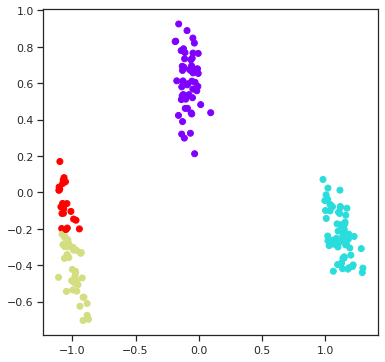

In [ ]:
GMM4_pca = GaussianMixture(n_components = 4, random_state=seed)

plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], c = GMM4_pca.fit_predict(X_principal), cmap ='rainbow')
plt.show()

In [ ]:
GMM5_pca = GaussianMixture(n_components = 5, random_state=seed)

plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], c = GMM5_pca.fit_predict(X_principal), cmap ='rainbow')
plt.show()

In [ ]:
GMM6_pca = GaussianMixture(n_components = 6, random_state=seed)

plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], c = GMM6_pca.fit_predict(X_principal), cmap ='rainbow')
plt.show()

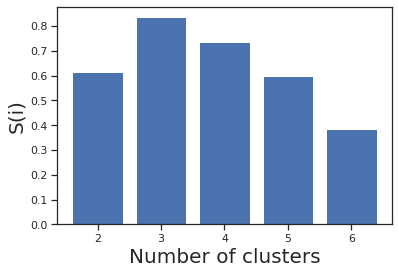

In [ ]:
k = [2, 3, 4, 5, 6]
  
# To append the silhouette scores of the GMM model for different no. of clusters
silhouette_scores_gmm_pca = []

silhouette_scores_gmm_pca.append(silhouette_score(X_principal, GMM2_pca.fit_predict(X_principal)))
silhouette_scores_gmm_pca.append(silhouette_score(X_principal, GMM3_pca.fit_predict(X_principal)))
silhouette_scores_gmm_pca.append(silhouette_score(X_principal, GMM4_pca.fit_predict(X_principal)))
silhouette_scores_gmm_pca.append(silhouette_score(X_principal, GMM5_pca.fit_predict(X_principal)))
silhouette_scores_gmm_pca.append(silhouette_score(X_principal, GMM6_pca.fit_predict(X_principal)))
  
# Plot a bar graph to compare the results
plt.bar(k, silhouette_scores_gmm_pca)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

###Observation of GMM Clust. after PCA:

no. of clusters predicted =3, since it has maximum silhouette_scores_gmm_pca

PCA advantages:

Speeds up computation

However, it masks the original data and is less interpretable.